In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
df = pd.read_csv('../timing_tests/run_time_tests.csv')
df = df.drop(0)

In [12]:
df[procs]=df[procs].apply(lambda x: if x==160 x=512)

SyntaxError: invalid syntax (<ipython-input-12-eea2f29b3f43>, line 1)

In [4]:
def select(df, props, vals):
    for p, v in zip(props, vals):
        df= df[df[p]==v]
    return df

In [5]:
PLOTPATH = '/global/homes/v/vboehm/codes/MADLens/figures'

     mesh  boxsize   zs  steps interp   procs    vjp    jvp    PGD  time
53  256.0    256.0  0.5   11.0   False   32.0  False  False  False  28.0
54  256.0    256.0  1.0   11.0   False   32.0  False  False  False  39.0
55  256.0    256.0  1.5   11.0   False   32.0  False  False  False  51.0
56  256.0    256.0  2.0   11.0   False   32.0  False  False  False  59.0
    mesh  boxsize   zs  steps interp   procs    vjp    jvp    PGD  time
1  128.0    256.0  0.5   11.0   False   32.0  False  False  False  11.0
2  128.0    256.0  1.0   11.0   False   32.0  False  False  False  14.0
3  128.0    256.0  1.5   11.0   False   32.0  False  False  False  17.0
4  128.0    256.0  2.0   11.0   False   32.0  False  False  False  23.0


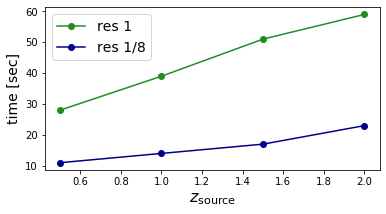

In [6]:
dd = select(df, ['interp ','steps', 'PGD'],[False,11, False])
d1 = select(dd, ['mesh','boxsize','procs'], [256, 256, 32])
d2 = select(dd, ['mesh','boxsize', 'procs'], [128, 256, 32])

print(d1)
print(d2)
plt.figure(figsize=(6,3))
plt.plot(d1['zs'], d1['time'],marker='o', label='res 1', color='forestgreen')
plt.plot(d2['zs'], d2['time'],marker='o', label='res 1/8', color='darkblue')
plt.legend(fontsize=14)
plt.ylabel('time [sec]', fontsize=14)
plt.xlabel('$z_\mathrm{source}$', fontsize=16)
plt.savefig(os.path.join(PLOTPATH,'timing.pdf'),bbox_inches='tight')
plt.show()

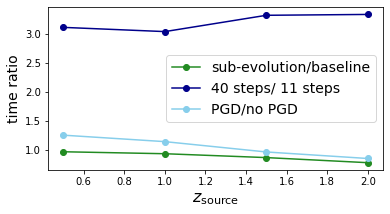

In [7]:
colors = ['forestgreen','darkblue','skyblue']
plt.figure(figsize=(6,3))
for ii,(mesh, procs, ls) in enumerate(zip([256],[64],['-'])):
    dd = select(df, ['mesh','boxsize'],[mesh,256])
    d1 = select(dd, ['interp ', 'steps', 'vjp', 'jvp','PGD'], [True, 11, False, False, False])
    d2 = select(dd, ['interp ','steps','procs','PGD'], [False, 11, procs, False])
    d3 = select(dd, ['interp ', 'steps','procs','PGD'], [False, 11, procs, True])
    d4 = select(dd, ['interp ','steps','procs','PGD'], [False, 40, procs, False])

    d = plt.plot(d1['zs'], d1['time'].to_numpy()/d2['time'],marker='o', ls=ls, color=colors[0], label='sub-evolution/baseline')
    plt.plot(d2['zs'], d4['time'].to_numpy()/d2['time'],marker='o',ls=ls,color= colors[1],label='40 steps/ 11 steps')
    plt.plot(d2['zs'], d3['time'].to_numpy()/d2['time'],marker='o',ls=ls,color= colors[2],label='PGD/no PGD')

plt.legend(fontsize=14)
plt.ylabel('time ratio', fontsize=14)
plt.xlabel('$z_\mathrm{source}$', fontsize=16)
plt.savefig(os.path.join(PLOTPATH,'timing_ratios.pdf'),bbox_inches='tight')
plt.show()

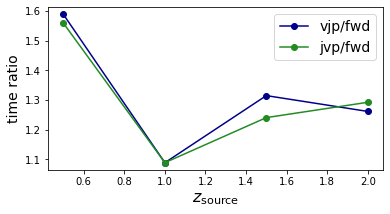

In [8]:
dd = select(df, ['mesh','boxsize'],[256,256])

d_vjp = select(dd, ['interp ', 'steps', 'vjp', 'jvp'], [True, 11, True, False])
d_jvp = select(dd, ['interp ', 'steps', 'vjp', 'jvp'], [True, 11, False, True])
d_fwd = select(dd, ['interp ', 'steps', 'vjp', 'jvp'], [True, 11, False, False])

plt.figure(figsize=(6,3))
plt.plot(d_vjp['zs'], d_vjp['time'].to_numpy()/d_fwd['time']-1,marker='o', label='vjp/fwd', color='darkblue')
plt.plot(d_jvp['zs'], d_jvp['time'].to_numpy()/d_fwd['time']-1,marker='o', label='jvp/fwd', color='forestgreen')
plt.legend(fontsize=14)
plt.ylabel('time ratio', fontsize=14)
plt.xlabel('$z_\mathrm{source}$', fontsize=16)
plt.savefig(os.path.join(PLOTPATH,'vjp_jvp_timing.pdf'),bbox_inches='tight')
plt.show()

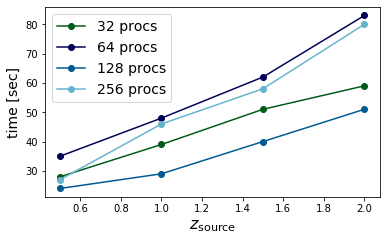

In [9]:
from matplotlib import cm
dd = select(df, ['mesh','boxsize'],[256,256])
cm_subsection = np.linspace(0.1, 0.8, 4) 

colors = [ cm.ocean(x) for x in cm_subsection ]

plt.figure(figsize=(6,3.5))
for ii, procs in enumerate([32.,64.,128.,256.]):
    d_1 = select(dd, ['interp ', 'steps', 'vjp', 'jvp','procs', 'PGD'], [False, 11, False, False, procs, False])

    plt.plot(d_1['zs'], d_1['time'].to_numpy(),marker='o', color=colors[ii],label='%d procs'%procs)

plt.legend(fontsize=14,ncol=1)
plt.ylabel('time [sec]', fontsize=14)
plt.xlabel('$z_\mathrm{source}$', fontsize=16)
plt.savefig(os.path.join(PLOTPATH,'timing_procs.pdf'),bbox_inches='tight')
plt.show()

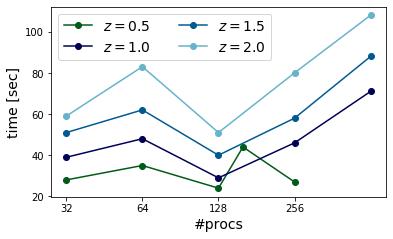

In [10]:
from matplotlib.ticker import StrMethodFormatter, NullFormatter

dd = select(df, ['mesh','boxsize'],[256,256])

d_1 = select(dd, ['interp ', 'steps', 'vjp', 'jvp','PGD'], [False, 11, False, False, False])

cm_subsection = np.linspace(0.1, 0.8,len(d_1['zs'].unique()) ) 

colors = [ cm.ocean(x) for x in cm_subsection ]
fig, ax = plt.subplots(1,1,figsize=(6,3.5))

for ii, z in enumerate(d_1['zs'].unique()):
    d_11 = d_1[d_1['zs']==z]
    d_11 = d_11.sort_values('procs')
    ax.plot(d_11['procs'], d_11['time'].to_numpy(),marker='o', color=colors[ii],label='$z=$%.1f'%z)

ax.set_xscale('log')

ax.minorticks_off()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:d}'))
ax.xaxis.set_minor_formatter(NullFormatter())

ax.set_xticks([32, 64, 128,256])


plt.legend(fontsize=14,ncol=2)
plt.ylabel('time [sec]', fontsize=14)
plt.xlabel('#procs', fontsize=14)
plt.savefig(os.path.join(PLOTPATH,'timing_procs_1.pdf'),bbox_inches='tight')
plt.show()